In [1]:
!which python

/opt/anaconda3/envs/document_scanner/bin/python


In [2]:
import torch
import torchvision

print(torch.__version__)
print(torchvision.__version__)

2.7.1
0.22.1


In [3]:
# device agnostic code
device = torch.device(
    "mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu"
)
device

device(type='mps')

In [4]:
# imports
import os
cwd = os.getcwd()
os.chdir('..')

from src.predictions import make_predictions, plot_predictions, calculate_corner_errors
from src.data_setup import create_dataloaders
from src.model_builder import DocDetector
from src.utils import load_model

os.chdir(cwd)

In [5]:
os.getcwd()

'/Users/manish/Documents/GitHub/document-scanner-pytorch/notebooks'

In [6]:
# data setup
DATA_DIR = '../data'
BATCH_SIZE = 32
NUM_WORKERS = 0
TRAIN_SPLIT = 0.8
TARGET_SIZE = (512, 512)

train_dataloader, val_dataloader = create_dataloaders(
    data_dir=DATA_DIR,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    train_split=TRAIN_SPLIT,
    target_size=TARGET_SIZE
)

train_dataloader, val_dataloader

Train dataset size: 160
Val dataset size: 40
Batch size: 32
Num workers: 0
Train split: 0.8
Target size: (512, 512)


(<torch.utils.data.dataloader.DataLoader at 0x13118e660>,
 <torch.utils.data.dataloader.DataLoader at 0x13124ad50>)

In [7]:
# model code
model = DocDetector().to(device)

In [8]:
# load model
SAVED_MODEL_PATH = '../model/DocDetector.pth/DocDetector.pth'
model = load_model(
    model=model,
    model_path=SAVED_MODEL_PATH,
    device=device
)

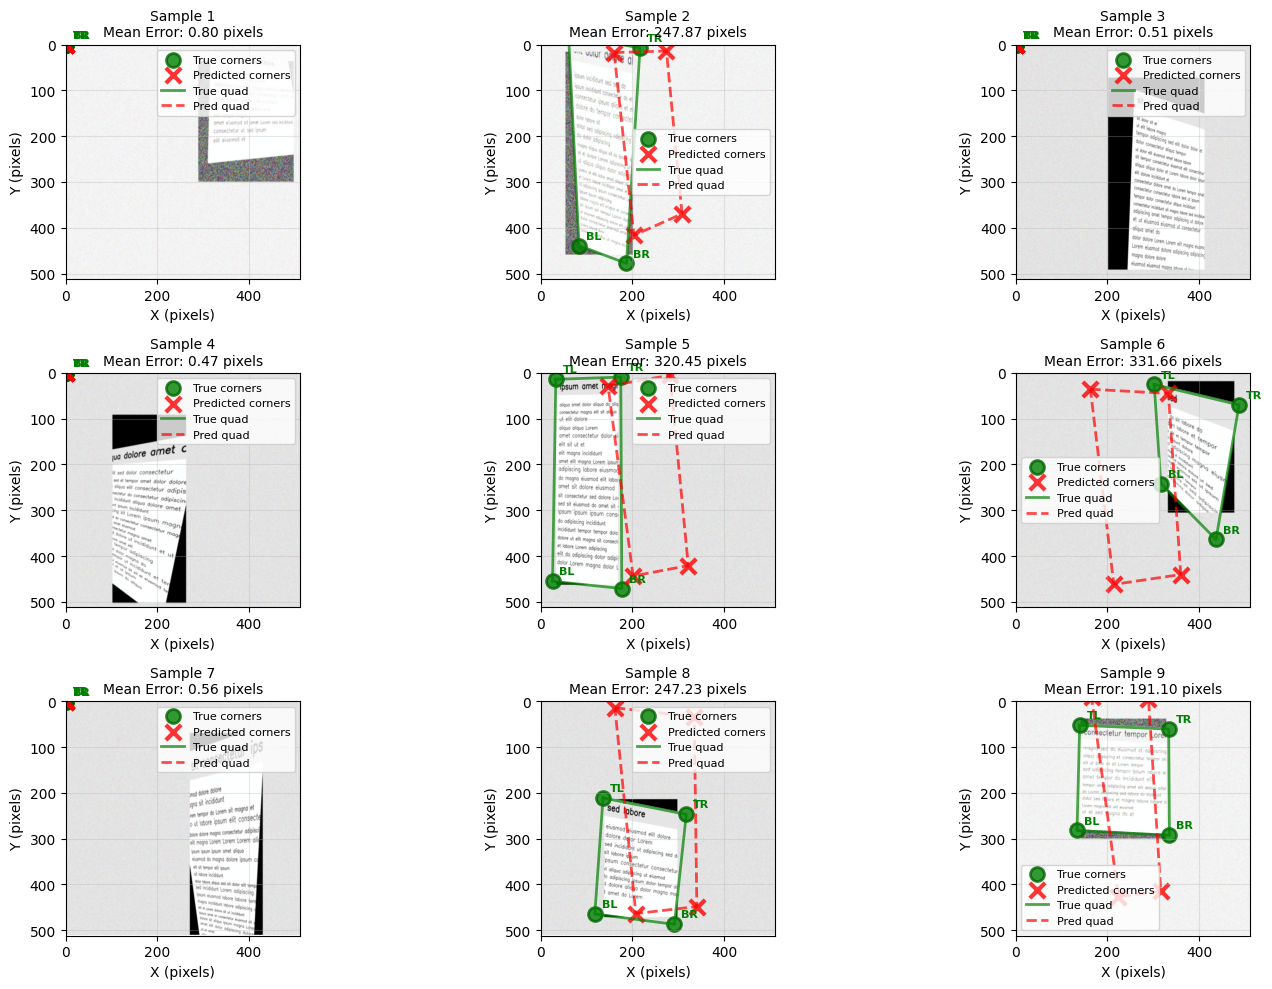

In [9]:
# predictions
NUM_SAMPLES = 9

images, true_corners, pred_corners = make_predictions(
    model=model,
    dataloader=val_dataloader,
    device=device,
    num_samples=NUM_SAMPLES
)

# plot the predictions
plot_predictions(
    images=images,
    true_corners=true_corners,
    pred_corners=pred_corners,
)